In [1]:
import json
import os
import numpy as np

os.getcwd()

'/home/richard/github/laplax/richard_workspace'

In [2]:
with open('../data/exp/20250611/kfac_lambda.json', 'r') as file:
    d = json.load(file)

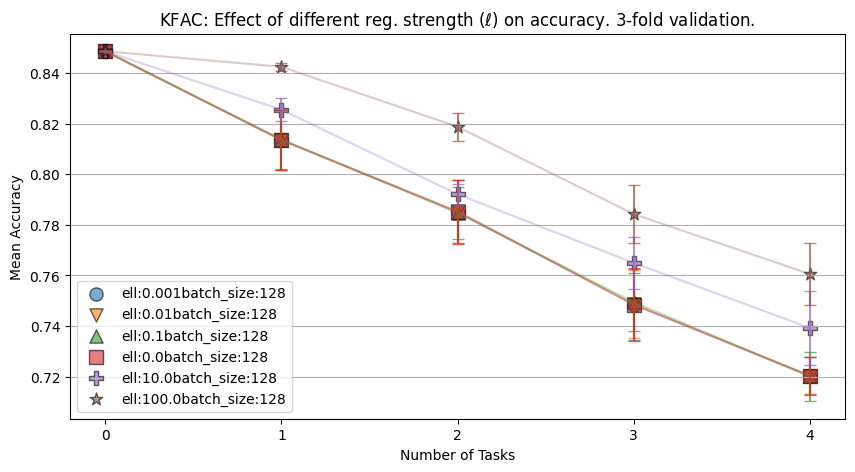

In [7]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 1, figsize=(10, 5))

def get_n_colors(n):
    cmap = plt.get_cmap('tab10')  # or 'tab20', 'hsv', etc.
    return [cmap(i % cmap.N) for i in range(n)]

colors = dict(
    zip(
        list(d.keys()), get_n_colors(len(d.keys()))
    )
)
markers = dict(
    zip(
        list(d.keys()), ["o", "v", "^", "s", "P", "*", "D", "H"]
    )
)

assert len(markers) == len(d.keys())

for label in d.keys():
    raccus, hist_accus = d[label]['raccu'], d[label]['hists']
    means = np.array([[np.mean(r) for r in rr] for rr in raccus])
    stds = means.std(axis=0)
    means = means.mean(axis=0) # sum away the "repetition" axis

    xvals = np.linspace(0, 4, 5)
    axs.scatter(xvals, means, marker=markers[label], color=colors[label], label=label, s=90, edgecolors='black', alpha=0.6)
    axs.plot(xvals, means, color=colors[label], alpha=0.3)
    axs.errorbar(xvals, means, yerr=stds, fmt='none', ecolor=colors[label], capsize=4, alpha=0.7)


axs.set_xticks(np.arange(5), np.arange(5))
axs.grid(axis='y')

plt.title('KFAC: Effect of different reg. strength ($\\ell$) on accuracy. 3-fold validation.')
plt.ylabel('Mean Accuracy')
plt.xlabel("Number of Tasks")

axs.legend(loc='lower left')
plt.savefig('kfac_fisher_different_ells.png', dpi=300, bbox_inches='tight')
plt.show()

In [8]:
def means_and_stds_transposed(i : int):
    raccu = d[list(d.keys())[i]]['raccu']
    means = [np.array(l).mean(0) for l in [[rr[i] for rr in raccu] for i in range(len(raccu[0]))]]
    stds = [np.array(l).std(0) for l in [[rr[i] for rr in raccu] for i in range(len(raccu[0]))]]
    return transpose(means, stds)

def transpose(means, stds):
    means_t, stds_t = [], []
    for col in range(len(means)):
        m = []
        for row in range(col, len(means)):
            m.append(means[row][col])
        means_t.append(m)
    
    for col in range(len(stds)):
        m = []
        for row in range(col, len(stds)):
            m.append(stds[row][col])
        stds_t.append(m)
    return means_t, stds_t

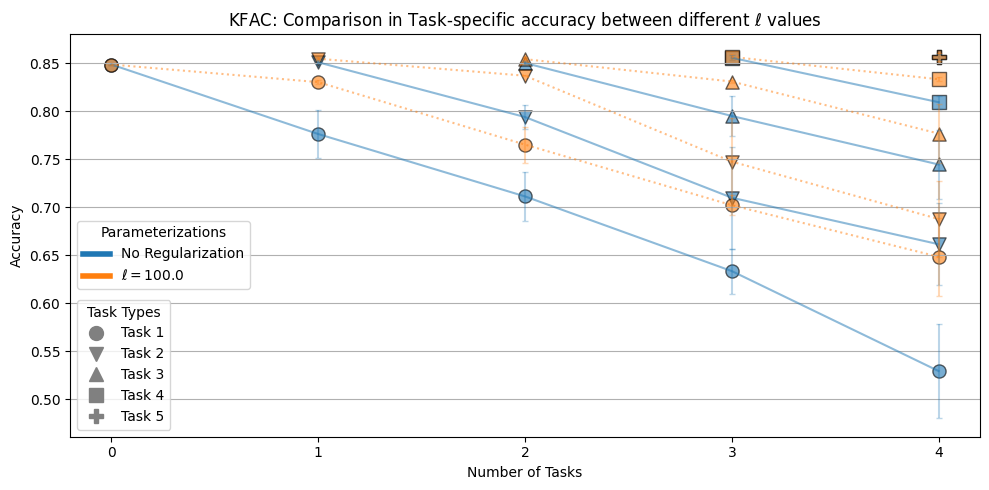

In [10]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

colors = get_n_colors(3)
markers = ["o", "v", "^", "s", "P"]
linestyles = ['solid', 'dotted', 'dashed']
task_labels = ['Task {}'.format(i+1) for i in range(len(markers))]
param_labels = ['No Regularization', '$\\ell=100.0$']

for color_idx, exp_index in enumerate([3, 5]):
    means_t, stds_t = means_and_stds_transposed(i=exp_index)
    for i, (m, s) in enumerate(zip(means_t, stds_t)):
        xs = range(i, len(means_t))
        ax.plot(xs, m, color=colors[color_idx], alpha=0.5, linestyle=linestyles[color_idx])
        ax.scatter(xs, m, marker=markers[i], color=colors[color_idx], s=90, edgecolors='black', alpha=0.6)
        ax.errorbar(xs, m, yerr=s, fmt='none', ecolor=colors[color_idx], capsize=2, alpha=0.3)

ax.grid(axis='y')
plt.title('KFAC: Comparison in Task-specific accuracy between different $\\ell$ values')
plt.ylabel('Accuracy')
plt.xlabel('Number of Tasks')

# Custom legend handles
marker_handles = [Line2D([0], [0], marker=mk, color='gray', linestyle='None', markersize=10, label=lbl) for mk, lbl in zip(markers, task_labels)]
color_handles = [Line2D([0], [0], color=clr, lw=4, label=lbl) for clr, lbl in zip(colors, param_labels)]

# Create the first legend for markers (Task Types)
legend1 = ax.legend(handles=marker_handles, title='Task Types', loc='lower left')
ax.add_artist(legend1)

# Create the second legend for line colors (Parameterizations)
legend2 = ax.legend(handles=color_handles, title='Parameterizations', loc='lower left', bbox_to_anchor=(0, 0.35))

ax.set_xticks(np.arange(5), np.arange(5))
plt.tight_layout()
plt.savefig('kfac_ell_versus_task_specific_accuracy.png', dpi=300, bbox_inches='tight')
plt.show()